# ЛР №2 Методы вычислений
Врублевская Екатерина,
3 курс 13 группа

## Задание 1

Постройте квадратурную формулу максимально возможной степени точности
одного из следующих ниже видов (в соответствии с вариантом). Проверьте полученный
результат.

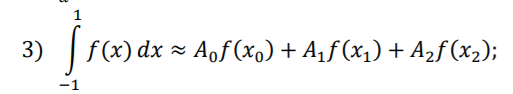

#### Решение
Как мы знаем, КФ является КФ НАСТ $\Leftrightarrow$ \begin{equation*}
 \begin{cases}
   &\text{она интерполяционная}\\
   &\text{$ x_k такие, что \forall  j=0,...,n$ $\int\limits_a^b w(x)\cdot\rho(x)\cdot x^j\,dx =0$}
 \end{cases}
\end{equation*} 
Интерполяционная КФ - это значит, что ее коэффициенты $A_i$ представлены в виде $A_i=\int\limits_a^b\prod\limits_{j \neq i}\frac{x-x_j}{x_i-x_j}\,dx$  
Значит мы можем найти узлы для квадратурной формулы из условия 2 и потом, подставив их в формулу нахождения коэффициентов, найти $A_i$.  
В моем варианте $\rho(x)=1$.  


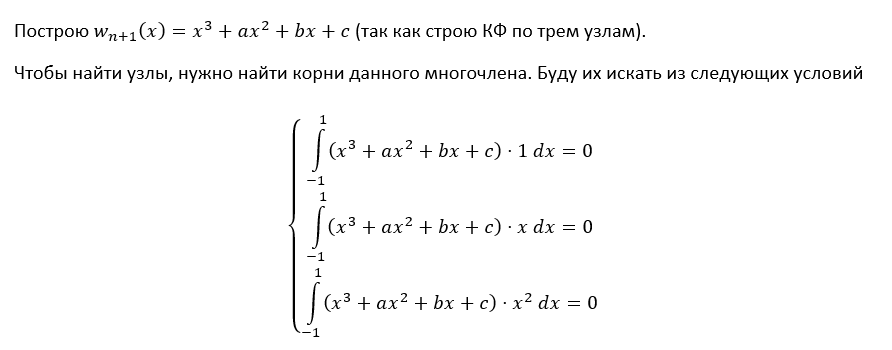

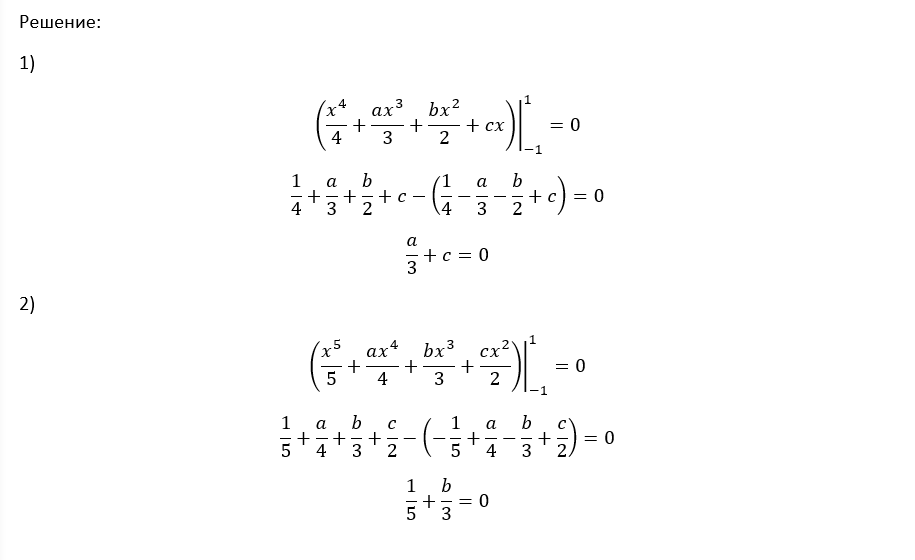
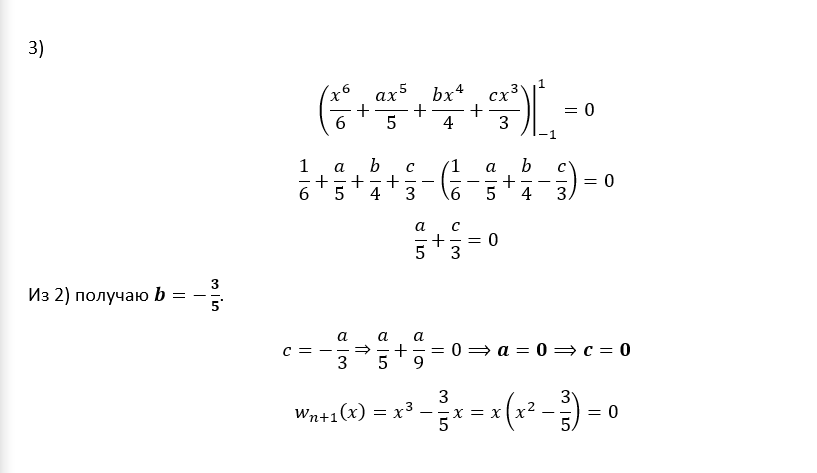
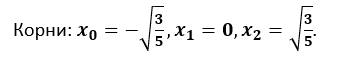

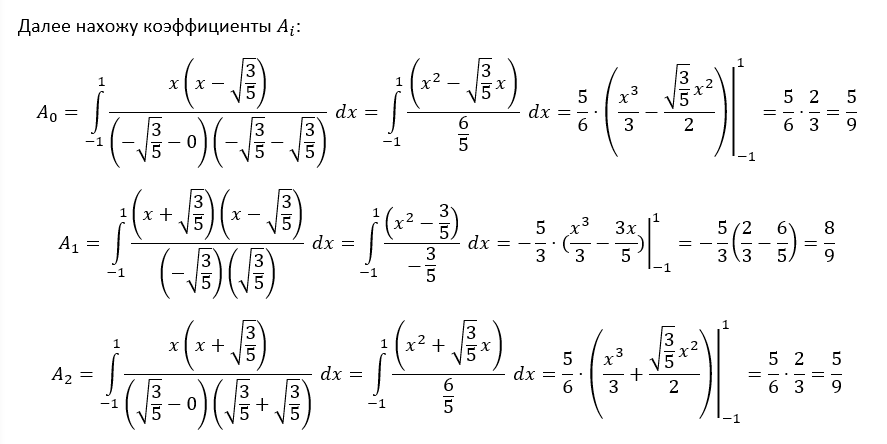
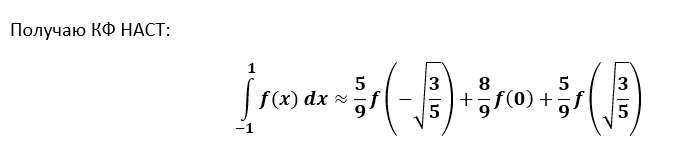

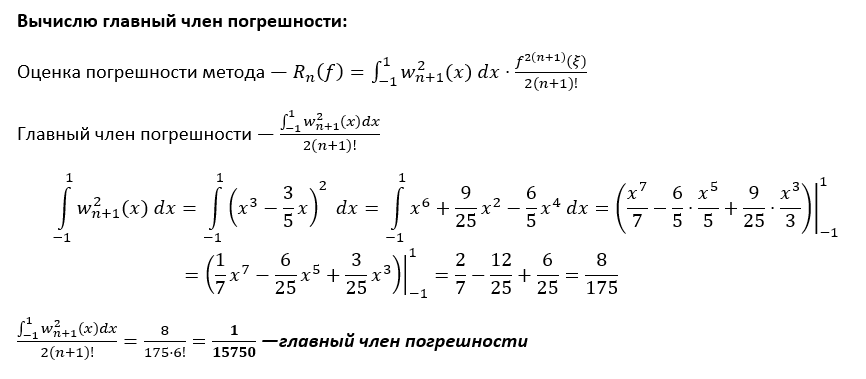

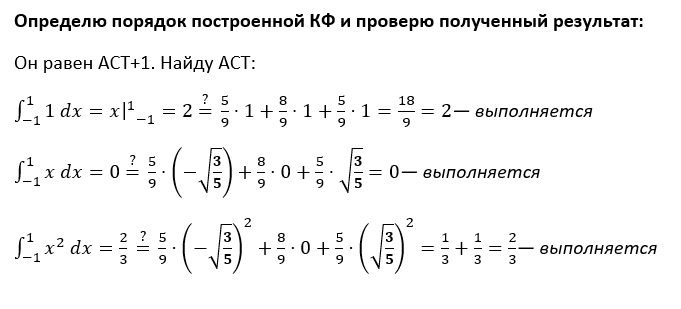
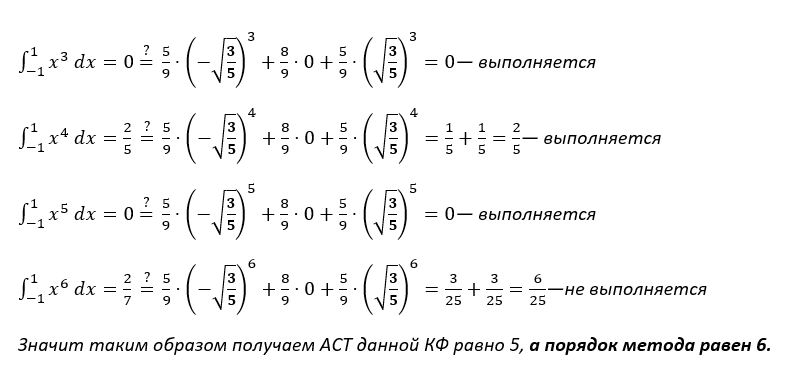
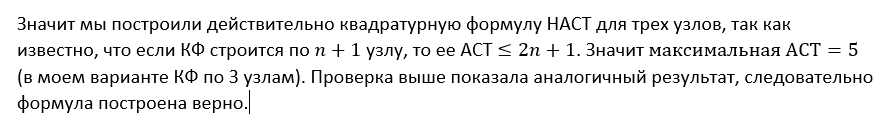

#### Итоги:  
Порядок построенной КФ равен 6.  
Она действительно является квадратурной формулой наивысшей степени точности.

## Задание 2

Для интеграла, соответствующего вашему варианту, проделать следующее:  
1. Вычислить интеграл методом с пятью равноотстоящими узлами, а также методом Гаусса-3 с шагами равными $\frac{𝑏−𝑎}{1024^𝑖}, 𝑖=0̅̅̅,̅2̅.$
2. Вычислить интеграл методами из предыдущего пункта с выбором шага. Выбор шага осуществлять таким образом, чтобы итоговая точность вычисления была не менее $10^{−12}$.
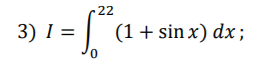
  
#### Точное значение:   
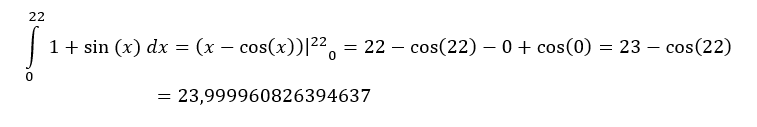
#### Формула для метода по 5 равноотстоящим узлам для одного отрезка:
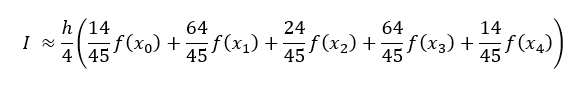, где h=b-a.  
Составная получается путем применения данной к каждому отдельному маленькому отрезку.  
#### Формула для метода Гаусса по 3 узлам: 
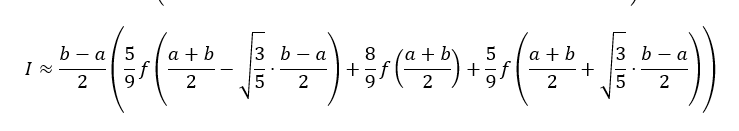
Составная получается путем применения данной к каждому отдельному маленькому отрезку.  

In [123]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib import pyplot as plt

In [137]:
a=0
b=22
value = 23.999960826394637

def f(x):
    return 1 + sin(x)

def calcH(i):
    return (b - a) / 1024**i

h0=calcH(0)
h1=calcH(1)
h2=calcH(2)

print("h: ",h0,h1,h2)

h:  22.0 0.021484375 2.09808349609375e-05


In [138]:
def gauss3(h):
    start_time = time.perf_counter_ns()
    res = 0
    for i in range(0, int((b-a)/h)):
        a_i = a + i*h
        if(a + (i+1)*h < b):
            b_i = a + (i+1)*h
        else:
            b_i = b
        res += h/2*(5/9*f((a_i+b_i)/2-sqrt(3/5)*(b_i-a_i)/2)+8/9*f((a_i+b_i)/2)+5/9*f((a_i+b_i)/2+sqrt(3/5)*(b_i-a_i)/2))
    print(f"Время вычисления интеграла КФ Гаусса-3 с шагом {h}: {time.perf_counter_ns() - start_time}нс")
    print(f"Погрешность вычисления интеграла КФ Гаусса-3 с шагом {h}: {abs(value - res)}")
    print(f"Значение интеграла, вычисленное по КФ Гаусса-3 с шагом {h}: {res}")
    print("\n")
    return res
def ravn_nodes(h):
    start_time = time.perf_counter_ns()
    res = 0
    for i in range(0, int((b-a)/h)):
        a_i = a + i*h
        if(a + (i+1)*h < b):
            b_i = a + (i+1)*h
        else:
            b_i = b
        res += (14/45*f(a_i + 0*h/4) + 64/45*f(a_i + 1*h/4)+24/45*f(a_i + 2*h/4)+64/45*f(a_i + 3*h/4)+14/45*f(a_i + 4*h/4))* (b_i-a_i)/4
    print(f"Время вычисления интеграла КФ c 5 равноотстоящими узлами с шагом {h}: {time.perf_counter_ns() - start_time}нс")
    print(f"Погрешность вычисления интеграла КФ c 5 равноотстоящими узлами с шагом {h}: {abs(value - res)}")
    print(f"Значение интеграла, вычисленное по КФ c 5 равноотстоящими узлами с шагом {h}: {res}")
    print("\n")
    return res

In [139]:
ravn_nodes(h0)
ravn_nodes(h1)
ravn_nodes(h2)
gauss3(h0)
gauss3(h1)
gauss3(h2)

Время вычисления интеграла КФ c 5 равноотстоящими узлами с шагом 22.0: 11200нс
Погрешность вычисления интеграла КФ c 5 равноотстоящими узлами с шагом 22.0: 16.03504734183382
Значение интеграла, вычисленное по КФ c 5 равноотстоящими узлами с шагом 22.0: 7.964913484560818


Время вычисления интеграла КФ c 5 равноотстоящими узлами с шагом 0.021484375: 1669900нс
Погрешность вычисления интеграла КФ c 5 равноотстоящими узлами с шагом 0.021484375: 2.842170943040401e-14
Значение интеграла, вычисленное по КФ c 5 равноотстоящими узлами с шагом 0.021484375: 23.999960826394666


Время вычисления интеграла КФ c 5 равноотстоящими узлами с шагом 2.09808349609375e-05: 1570970200нс
Погрешность вычисления интеграла КФ c 5 равноотстоящими узлами с шагом 2.09808349609375e-05: 1.566746732351021e-12
Значение интеграла, вычисленное по КФ c 5 равноотстоящими узлами с шагом 2.09808349609375e-05: 23.99996082639307


Время вычисления интеграла КФ Гаусса-3 с шагом 22.0: 7500нс
Погрешность вычисления интеграла КФ 

23.999960826393064

Время вычисления интеграла КФ с 5 равноотстоящими узлами с шагом 22.0: 11200нс  
Время вычисления интеграла КФ с 5 равноотстоящими узлами с шагом 0.021484375: 2802500нс  
Время вычисления интеграла КФ с 5 равноотстоящими узлами с шагом 2.09808349609375e-05: 1506213900нс  
  
Погрешность вычисления интеграла КФ с 5 равноотстоящими узлами с шагом 22.0: 16.03504734183382  
Погрешность вычисления интеграла КФ с 5 равноотстоящими узлами с шагом 0.021484375: 2.842170943040401e-14  
Погрешность вычисления интеграла КФ с 5 равноотстоящими узлами с шагом 2.09808349609375e-05: 1.566746732351021e-12  
  
Значение интеграла, вычисленное по КФ с 5 равноотстоящими узлами с шагом 22.0: 7.964913484560818  
Значение интеграла, вычисленное по КФ с 5 равноотстоящими узлами с шагом 0.021484375: 23.999960826394666  
Значение интеграла, вычисленное по КФ с 5 равноотстоящими узлами с шагом 2.09808349609375e-05: 23.99996082639307  
  
  
Время вычисления интеграла КФ Гаусса-3 с шагом 22.0: 10200нс  
Время вычисления интеграла КФ Гаусса-3 с шагом 0.021484375: 2260600нс  
Время вычисления интеграла КФ Гаусса-3 с шагом 2.09808349609375e-05: 1217235500нс  
  
Погрешность вычисления интеграла КФ Гаусса-3 с шагом 22.0: 4.220679597570022  
Погрешность вычисления интеграла КФ Гаусса-3 с шагом 0.021484375: 2.4868995751603507e-14  
Погрешность вычисления интеграла КФ Гаусса-3 с шагом 2.09808349609375e-05: 1.573852159708622e-12  
  
Значение интеграла, вычисленное по КФ Гаусса-3 с шагом 22.0: 19.779281228824615  
Значение интеграла, вычисленное по КФ Гаусса-3 с шагом 0.021484375: 23.999960826394663  
Значение интеграла, вычисленное по КФ Гаусса-3 с шагом 2.09808349609375e-05: 23.999960826393064  
  
  
__Выводы:__  
Как мы видим, с уменьшением шага растет время нахождения приближенного значения интеграла. Это очень заметно при сравнении точности вычислений с шагом h0 и h1. Однако, также замечено, что не всегда уменьшение шага приводит к увеличению точности вычислений. В обоих методах видно, что при шаге $\frac{(b-a)}{1024^2}$ точность вычислений снижается по сравнению с шагом $\frac{(b-a)}{1024^1}$. Так что можно сделать вывод, что всегда нужно подумать, прежде чем брать очень маленький шаг. Также заметим, что обе формулы имеют порядок, равный 6. Однако получилось так, что погрешность вычислений для формулы Гаусса-3 вышла меньшей, чем для метода с 5 равноотстоящими узлами. При маленьких шагах разница между ними небольшая, но при шаге, равном длине отрезка, метод Гаусса-3 справился гораздо лучше. Также можно заметить, что метод Гаусса отработал быстрее. Предполагаю, это из-за того, что вычисления происходят на каждом отрезке по 3 узлам а не по 5.

In [140]:
a = 0
b = 22
value = 23.999960826394637
h_0 = 0.8
eps_all = 1e-12

def gauss_runge(h_0):
    hs = np.array([])
    a_i = a
    res = 0
    h = h_0
    p = 6
    start_time = time.perf_counter_ns()
    while a_i < b:
        if(a_i + h > b):
            h = b - a_i
        
        res1 = gauss3_r(a_i,h)
        res2 = gauss3_r(a_i,h/2) + gauss3_r(a_i+h/2,h/2)
        if((h/2)**p-(h)**p != 0):
            k = (res1-res2)/((h/2)**p-(h)**p) 
        eps = eps_all*h/22
        if(abs(k) * h**p < eps):
            hs = np.append(hs,h)
            a_i += h
            res += res1
        if(k != 0):
            h = 0.9999*(eps/abs(k))**(1/p)
        
    print(f"Время вычисления интеграла КФ Гаусса-3 с адаптивным выбором шага: {time.perf_counter_ns() - start_time}нс")
    print(f"Погрешность вычисления интеграла КФ Гаусса-3 с адаптивным выбором шага: {abs(value - res)}")
    print(f"Значение интеграла, вычисленное по КФ Гаусса-3 с адаптивным выбором шага: {res}")
    print("\n")
    return hs, res

def ravn_runge(h_0):
    hs = np.array([])
    a_i = a
    res = 0
    h = h_0
    p = 6
    start_time = time.perf_counter_ns()
    while a_i < b:
        if(a_i + h > b):
            h = b - a_i
        
        res1 = ravn_nodes_r(a_i, h)
        res2 = ravn_nodes_r(a_i, h/2) + ravn_nodes_r(a_i+h/2, h/2)
        if((h/2)**p-(h)**p != 0):
            k = (res1-res2)/((h/2)**p-(h)**p) 
        eps = eps_all*h/22
        if(abs(k) * h**p < eps):
            hs = np.append(hs,h)
            a_i += h
            res += res1
        if(k != 0):
            h = 0.9999*(eps/abs(k))**(1/p)
            
    print(f"Время вычисления интеграла КФ c 5 равноотстоящими узлами: {time.perf_counter_ns() - start_time}нс")
    print(f"Погрешность вычисления интеграла КФ c 5 равноотстоящими узлами: {abs(value - res)}")
    print(f"Значение интеграла, вычисленное по КФ c 5 равноотстоящими узлами: {res}")
    print("\n")
    return hs, res

def gauss3_r(a, h):
    a_i = a
    b_i = a + h
    res = h/2*(5/9*f((a_i+b_i)/2-sqrt(3/5)*(b_i-a_i)/2)+8/9*f((a_i+b_i)/2)+5/9*f((a_i+b_i)/2+sqrt(3/5)*(b_i-a_i)/2))
    return res
def ravn_nodes_r(a, h):
    a_i = a
    res = (14/45*f(a_i + 0*h/4) + 64/45*f(a_i + 1*h/4)+24/45*f(a_i + 2*h/4)+64/45*f(a_i + 3*h/4)+14/45*f(a_i + 4*h/4))* (h)/4
    return res

Время вычисления интеграла КФ Гаусса-3 с адаптивным выбором шага: 5308700нс
Погрешность вычисления интеграла КФ Гаусса-3 с адаптивным выбором шага: 1.1723955140041653e-13
Значение интеграла, вычисленное по КФ Гаусса-3 с адаптивным выбором шага: 23.999960826394755


Время вычисления интеграла КФ c 5 равноотстоящими узлами: 5350700нс
Погрешность вычисления интеграла КФ c 5 равноотстоящими узлами: 1.3500311979441904e-13
Значение интеграла, вычисленное по КФ c 5 равноотстоящими узлами: 23.999960826394503


Gauss


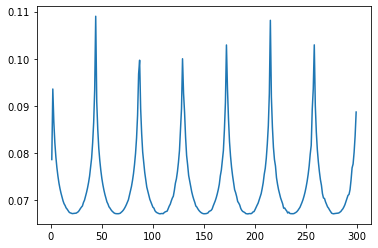

Ravn


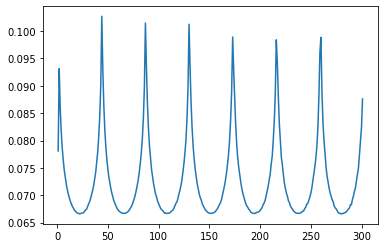

In [141]:
hs1,_ = gauss_runge(h_0)
hs2,_ = ravn_runge(h_0)
hs1 = hs1[:-1]
hs2 = hs2[:-1]

print("Gauss")
x = np.linspace(1, hs1.size, hs1.size)
y = hs1
plt.plot(x, y)
plt.show()

print("Ravn")
x = np.linspace(1, hs2.size, hs2.size)
y = hs2
plt.plot(x, y)
plt.show()

Время вычисления интеграла КФ Гаусса-3 с адаптивным выбором шага: 1800300нс  
Погрешность вычисления интеграла КФ Гаусса-3 с адаптивным выбором шага: 7.105427357601002e-15  
Значение интеграла, вычисленное по КФ Гаусса-3 с адаптивным выбором шага: 23.999960826394645  
  
Время вычисления интеграла КФ c 5 равноотстоящими узлами: 1839500нс  
Погрешность вычисления интеграла КФ c 5 равноотстоящими узлами: 1.1013412404281553e-13  
Значение интеграла, вычисленное по КФ c 5 равноотстоящими узлами: 23.999960826394528  
  
__Вывод:__ 
Опять же заметим, что вычисление интеграла методом Гаусса-3 происходит бытсрее, чем по 5 равноотстоящим узлам. Несмотря на то, что начальный шаг для эксперимента, в котором считалась точность, записанная выше, было выбрано значение 1, точность оказалась выше, чем вычисления с постоянным шагом из пункта 2.1 в случае обоих методов. И снова метод Гаусса-3 показал лучшую точность в сравнении с равноотстоящими узлами.  
Что касается графиков, там представлены все шаги, кроме последнего, так как последний кусочек отрезка получается очень маленьким и кривая на графике в этом месте представляет собой резкое падение. Также мы видим постоянную смену значений шага, причем как уменьшение, так и повышение. Это связано с тем, что на некоторых участках отрезка бОльший шаг даст бОльшую точность, а на некоторых наоборот. То есть получается, не всегда выгодно брать маленький шаг. Как видим, адаптивный выбор шага действительно подтвердил свою эффективность (достигнута лучшая точность, чем в методах с постоянным шагом). Также по времени это заняло в 2 раза меньше времени, чем методы с постоянным шагом равным $\frac{(b-a)}{1024^1}$ и $\frac{(b-a)}{1024^2}$. А так как выполняется быстрее и достигается бОльшая точность, данный метод является более эффективным.